<a href="https://colab.research.google.com/github/MatthewFried/Udemy/blob/master/Day2_Example2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 2**

## Introduction

In this assignment, we will be exploring and cleaning a data set consisting of data on more than 12,000 wines. 

To accomplish this, we will first perform an exploratory data analysis ("EDA") on each of the variables in an effort to discover any data integrity issues (i.e. missing or invalid values), uncover any outliers, and see the distribution of our data. 

Then, based on the results of our EDA, we will perform the necessary data preparation and cleaning in order to prepare the data for use in a machine learning model. This work will be guided by our domain knowledge and our EDA, and will be explained further in that section.

Lastly, we will again perform an EDA on our transformed data, in order to see the effects of our transformations on the data. We will compare the results of our transformed data to those of the original data and discuss how our transformations will lead to a better machine learning model.

## Data Profiling & Domain Knowledge Development

**Index** - This is a unique ID for each wine in the dataset.

**Target** - This represents the response variable, which is number of cases sold.

**Fixed Acidity** - The predominant fixed acids found in wines are tartaric, malic, citric, and succinic.  
Their respective levels found in wine can vary greatly but in general one would expect to see according to [this link](https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity):
- 1 to 4 g/L tartaric acid
- 0 to 8 g/L malic acid
- 0 to 0.5 g/L citric acid
- 0.5 to 2 g/L succinic acid
- 1.5 to 14.5 g/L when added up

**Volatile Acidity** - A measure of the wine's volatile (or gaseous) acids.  
The primary volatile acid in wine is acetic acid, which is also the primary acid associated with the smell and taste of vinegar.  
Volatile acidity concentration is regulated by the federal Tax and Trade Bureau, the maximum volatile acidity according to [this link](https://extension.psu.edu/volatile-acidity-in-wine#:~:text=Volatile%20acidity%20) is:
- 1.4 g/L for red wine 
- 1.2 g/L for white wine

**Citric Acid** - A weak organic acid that occurs naturally in citrus fruits. Part of the acids that compile Fixed Acidity in wine.  

**Residual Sugar** - According to [this link](http://www.moundtop.com/pdf/Winemaking-ResidualSugar.pdf),the Residual Sugar value in wine can vary from 1-2g/L up to 100-200g/L depending on the type of wine. 

**Chlorides** - According to [this link](https://www.scielo.br/scielo.php?script=sci_arttext&pid=S0101-20612015000100095#:~:text=Wine%20contains%20from%202%20to,2003%3B%20Maltman%2C%202013), chlorides are a major contributor to saltiness, and wine contains from 2 to 4 g/L of salts of mineral acids, along with some organic acids, and they have a key role on a potential salty taste of a wine.  

**Free Sulfur Dioxide** - The Free Sulfur Dioxide (FSO2) and the pH of a wine determine how much SO2 is available in the active, molecular form to help protect the wine from oxidation and spoilage.

**Total Sulfur Dioxide** - Total Sulfur Dioxide (TSO2) is the portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine such as aldehydes, pigments, or sugars. The TSO2 level is also regulated by the U.S. Alcohol and Tobacco Tax and Trade Bureau (TTB).   
The maximum allowable concentration for a bottled wine according to [this link](https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too) is: 350 ppm (mg/L) of TSO2.

**Density** - We know the density of water is about 1.000 g/mL so we can assume wine density should be around that value. [This link](https://chemwine.com/home/why-is-wine-density-important-1-sl6yl/) provides a formula to estimate a wine’s density.

**pH** - According to [this link](https://daily.sevenfifty.com/how-winemakers-analyze-ph-and-its-impact-on-wine/) pH levels in wine wine are generally between 3 and 4, with some wines reaching slightly beyond that, to high 2s or low 4s.   
For each full point increase in pH, the level of acidity is 10 times more acidic as you go up, so the difference between a pH of 3 and a pH of 4 is very significant.

**Sulphates** - According to [this link](http://blog.lastbottlewines.com/education/sulphites/), the level of Sulfites in wine can vary from 0.15g/L up to 0.3g/L depending on the type of wine. (Note: Our research did not yield any results for the spelling sulphates, so we inferred that this variable refers to sulfites.) 

**Alcohol** - Non-Alcoholic wine exists and Alcohol content in wine ranges wildly from as low as 5.5% to 23% ABV.     
[This link](https://winefolly.com/tips/the-lightest-to-the-strongest-wine/) provides more detailed information regarding different types of wine and their Alcohol content. 

**Label Appeal** - The description we were given for this field was "subjective marketing score that indicates the appeal of the design of the label on the bottle."

**Acid Index** - Acording to [this link](http://www.bcawa.ca/winemaking/acidph.htm), acid index is calculated by subtracting the pH from the Total Acidity (TA). This is differnt than the desription provided with the dataset ("Measures total acidity of wine via a weighted average").  

**STARS** - The description we were given for this field was "wine rating as determined by experts (4 = excellent; 1 = Poor)."

## Initial Exploratory Data Analysis

First we will read the data into python using pandas read csv function. Then we will look for missing and/or invalid data values and perform an exploratory data analysis on our dataset to determine what data need to be prepared for a future machine learning model. 

In [1]:
#first import the necessary libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#next read in the file
filename = 'https://raw.githubusercontent.com/MatthewFried/Udemy/master/Day2/Day2_Data.csv'
wine = pd.read_csv(filename)

#check results
wine.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


In [2]:
# check the dataset for null values
wine.isnull().sum()

INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64

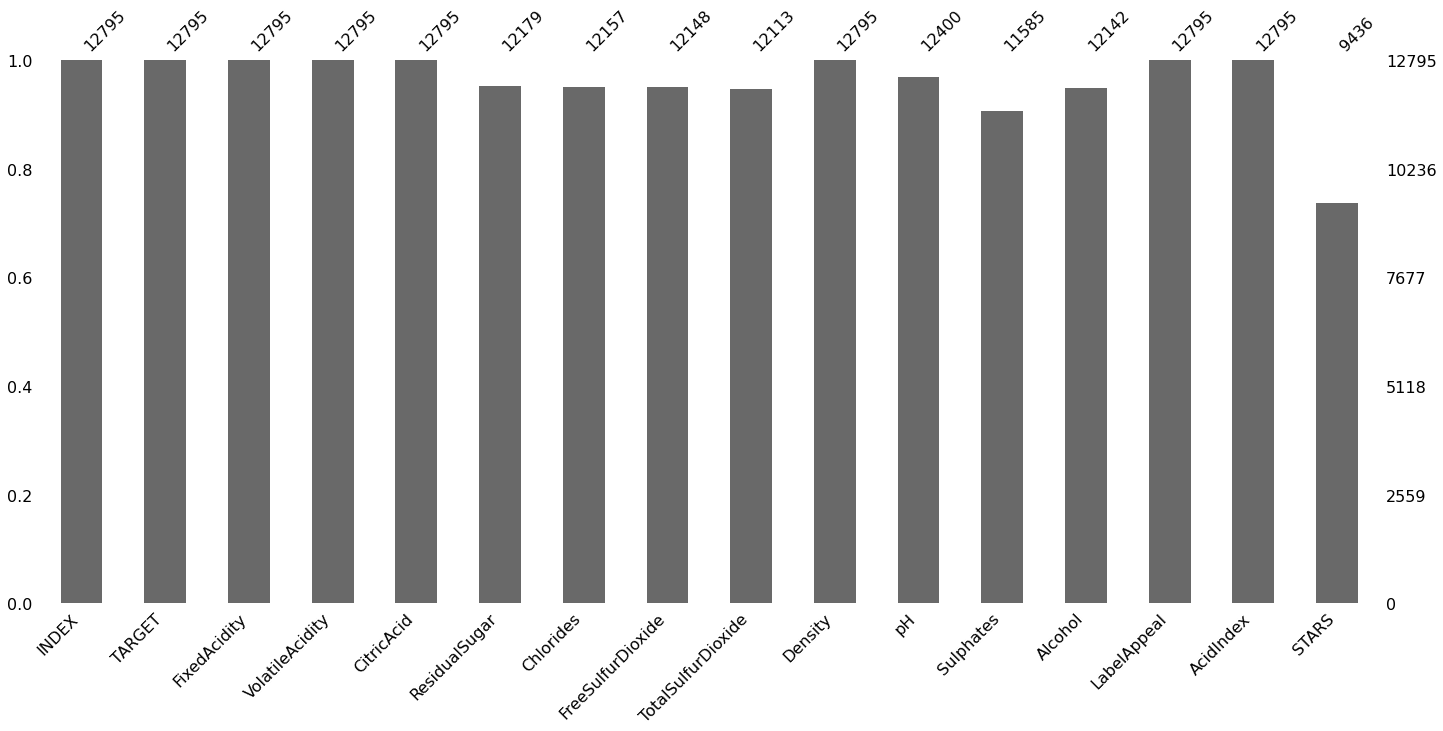

In [3]:
#first import missingno after pip install
import missingno as msno

#visualize the amount of missing data using missingno's bar chart
msno.bar(wine);

We see that the variables Residual Sugar, Chlorides, Free Sulfure Dioxide, Total Sulfur Dioxide, pH, Sulphates, Alcohol, and Stars all have missing values, with STARS having the most missing values of all variables.

In [ ]:
#get summary statistics for each variable, including mean, standard deviation, median, quartiles, and range
wine.describe()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,1.000000,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


We see from above that the range of fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates, alcohol, and label appeal contain negative values. From our domain knowledge and research, we know that, with the exception of label appeal, there should not be negative values for these attributes.

Now we will investigate further to see if the locations of the missing data are correlated by using missingno library's heatmap function. This investigation will help us determine how to treat missing values in our data preparation phase. 

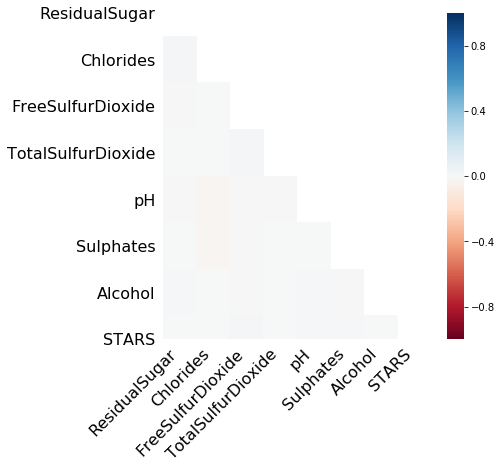

In [ ]:
#graph a heat map of the missing data to see if the locations where the data are missing are correlated.
#code as referenced in O'Reilley's Machine Learning Pocket Reference
ax = msno.heatmap(wine, figsize = (6,6))
ax.get_figure(); #add a ; at the end to prevent it from displaying twice

Based on the heat map above, there does not appear to be a correlation between the location of the missing data for the variables. Next we will look at a matrix to see if there is a pattern to the missing data.

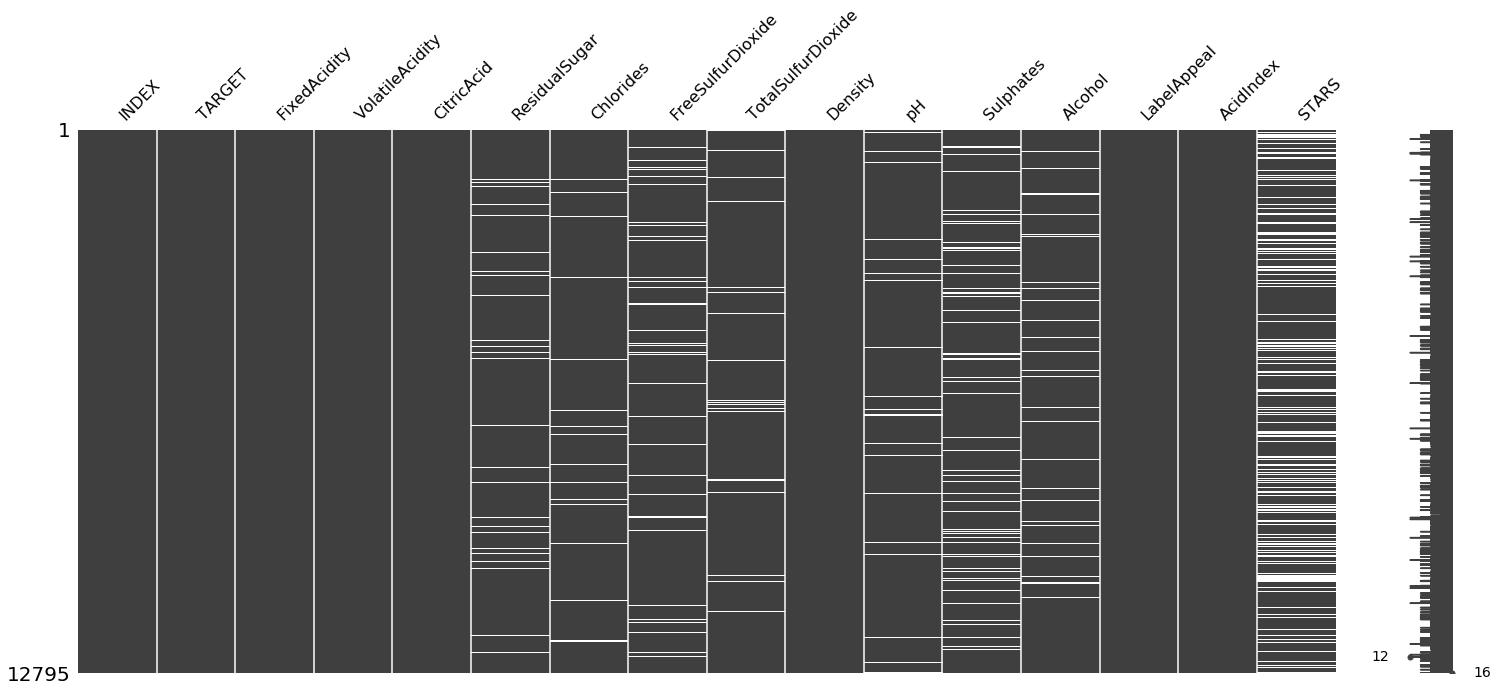

In [ ]:
#use missingnos matrix to see if there is a pattern to the missing data
ax2 = msno.matrix(wine)
ax2.get_figure();

Based on the matrix, it does not appear that there is a pattern to the missing data, which indicates our data is missing at random.

Next we will look at the distributions of our data to identify the shape of the distribution as well as identify any potential outliers.

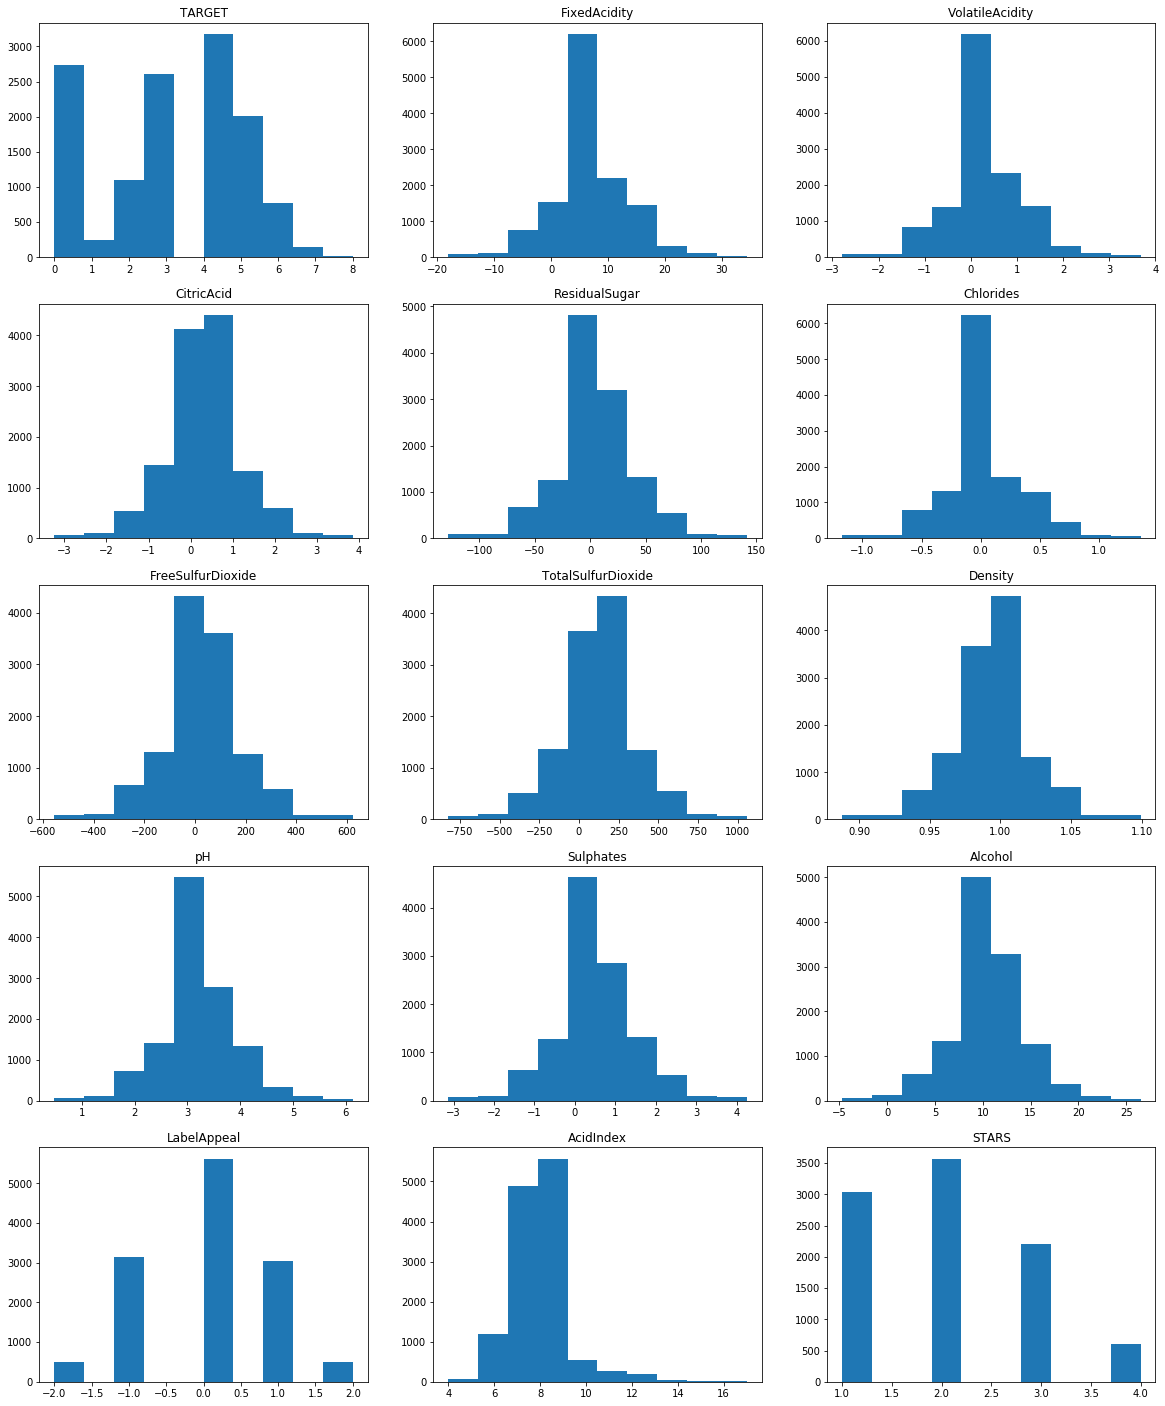

In [ ]:
#define a figure to which we will add a histogram for each of our attributes, except for index
plt.figure(figsize=(20,25))

#ignore warnings
np.warnings.filterwarnings('ignore')

#use an index to identify the spot of the subplot
j=1
columns=wine.columns.tolist()
for k in columns[1:] :   #for each column in the dataframe graph a histogram 
    plt.subplot(5,3,j) 
    plt.hist(wine[k])
    plt.title('%s' %k)
    j=j+1 #add 1 to go to the next subplot space

#show results    
plt.show()

From the above histograms, which ignore missing values, we see that the majority of our attributes are approximately normally distributed, with the exception of the response variable (target), acid index, and stars. 

Next we will look at boxplots of our data to see if there are any outliers.

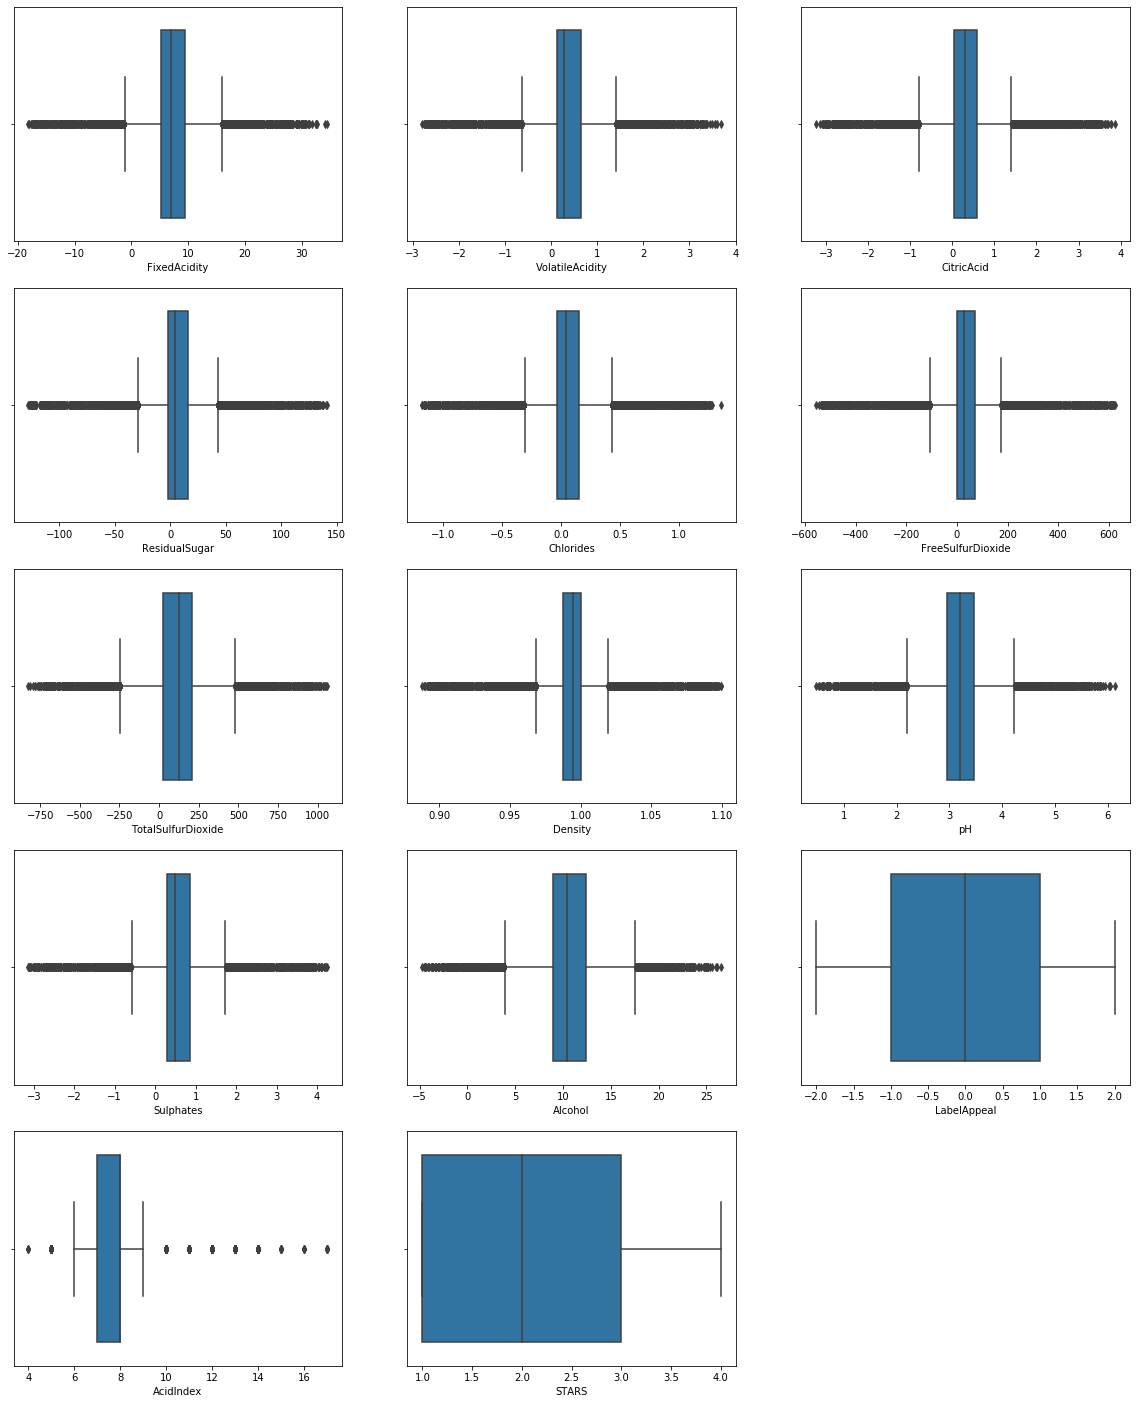

In [ ]:
#define a figure to which we will add boxplots of each attribute.
plt.figure(figsize=(20,25))

#use an index to identify the spot of the subplot
j=1
columns=wine.columns.tolist()
for k in columns[2:] :   #for each column in the dataframe
    plt.subplot(5,3,j) 
    sns.boxplot(x=k,data=wine)
    j=j+1 #add 1 to go to the next subplot space

#show results
plt.show()

From the above boxplots we see that most of our attributes have numerous outliers. We will discuss further below how we will deal with these outliers.

We will also check a correlation matrix between the variables before any transformation to see if our transformations have any effect on the correlation.

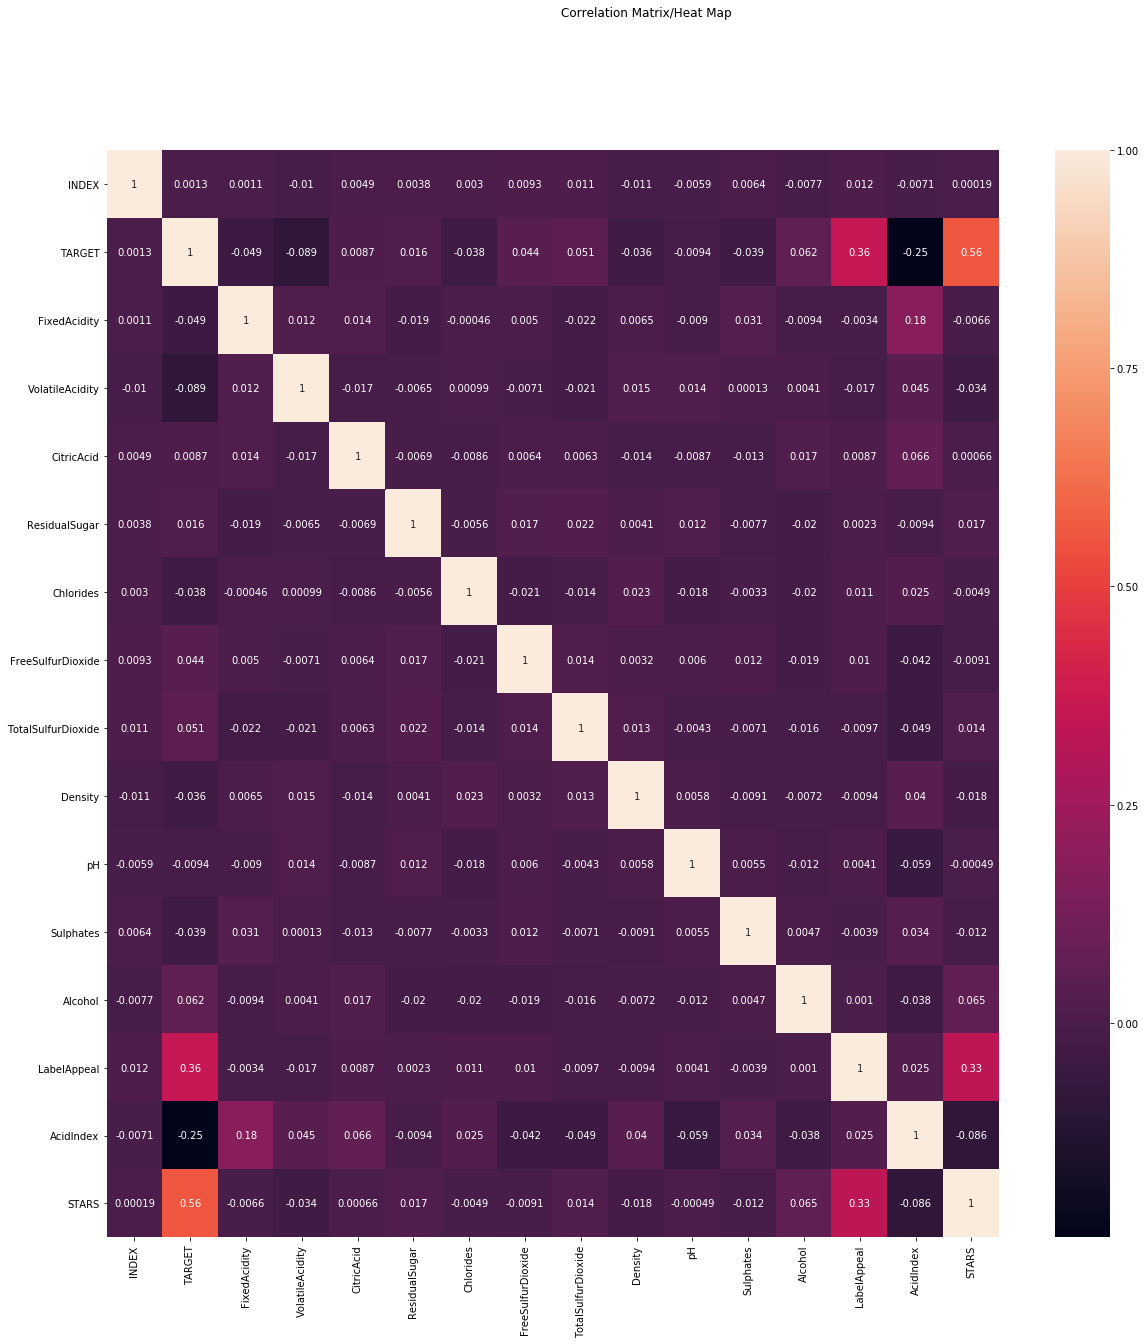

In [ ]:
#next get correlation matrix and plot it using seaborn
#note that there are issues with this plot that we resolved by following the code provided in the comments section here:
#https://github.com/mwaskom/seaborn/issues/1773
fig = plt.figure(figsize=(20, 20)) #set figure and figure size
corrMatrix = wine.corr() #get correlation matrix

sns.heatmap(corrMatrix, annot=True) #graph correlation matrix

# fix for mpl bug that cuts off top/bottom of seaborn viz taken from link above
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

fig.suptitle('Correlation Matrix/Heat Map') 
plt.show()

We see from our correlation matrix that none of our attributes have a particularly strong correlation. The strongest correlation of 0.56 is between our target attribute and the stars attribute.

Because there are so many invalid values, as well as so many missing values, we lay out below two different approaches to handling these situations. For option one, we eliminate all negative (invalid) values and then perform our EDA again to see how our adjustments have affected the data. For option two, we take the absolute value of the negative values, so that we will not be discarding as much of the original data set. We then perform another EDA to see how our adjustments have affected the data set.

## Data Preparation and EDA Review - Option 1: Eliminating all the negative values

Below we will eliminate all rows containing at least one negative value. We then perform another EDA to see how our techniques have affected the distributions of the attributes. Then we identify any further invalid data and/or outliers that may need to be removed, using both the distributions and our domain knowledge. 

In [ ]:
#create a copy of the original dataset consisting only of the positive values in columns that previously contained negative values. 
#does not include target,index, label appeal, or stars columns
positive_df=wine[(wine['FixedAcidity']>=0) & (wine['VolatileAcidity']>=0) & (wine['CitricAcid']>=0) & (wine['ResidualSugar']>=0)
        & (wine['Chlorides']>=0) & (wine['FreeSulfurDioxide']>=0)& (wine['TotalSulfurDioxide']>=0) & (wine['Density']>=0)
        & (wine['Sulphates']>=0) & (wine['Alcohol']>=0)].copy()

Below we will further eliminate invalid data using our domain knowledge. Specifically, we will eliminate data where the volatile acidity is less than 1.4, eliminate data where the total sulfur dioxide or free sulfur dioxide are less than 350, and eliminate data where the pH is smaller than 2 (which is the pH of vinegar) or larger than 5.

We also add 2 to every label appeal value to re-scale the data so that everything is positive.

In [ ]:
#create a copy of our dataset
positive=positive_df.copy()

#remove rows that have a volatile acidity above 1.4
positive=positive[positive.VolatileAcidity<=1.4]

#remove rows that have a total sulfur dioxide value above 350
positive=positive[(positive.TotalSulfurDioxide<=350)
                                                 | (positive.TotalSulfurDioxide.isnull()) ]

#remove rows that have a free sulfur dioxide value above 350
positive=positive[(positive.FreeSulfurDioxide<=350) | (positive.FreeSulfurDioxide.isnull())]

#remove rows that have a free sulfur dioxide values less than the total sulfur dioxide value for that data point
positive=positive[(positive.FreeSulfurDioxide<=positive.TotalSulfurDioxide) 
                              | (positive.FreeSulfurDioxide.isnull()) |(positive.TotalSulfurDioxide.isnull())]

#remove rows that have a pH less than 2 or greater than 5
positive=positive[((positive.pH >2) & (positive.pH<5))
                                                  | (positive.pH.isnull()) ]

#transform the label appeal by adding 2 to each of the values to create an attribute that is all positive.
positive['LabelAppeal']=positive['LabelAppeal']+2

#check shape
positive.shape

(555, 16)

In [ ]:
#check for null values after removing these rows
positive.isnull().sum()

INDEX                   0
TARGET                  0
FixedAcidity            0
VolatileAcidity         0
CitricAcid              0
ResidualSugar           0
Chlorides               0
FreeSulfurDioxide       0
TotalSulfurDioxide      0
Density                 0
pH                     21
Sulphates               0
Alcohol                 0
LabelAppeal             0
AcidIndex               0
STARS                 148
dtype: int64

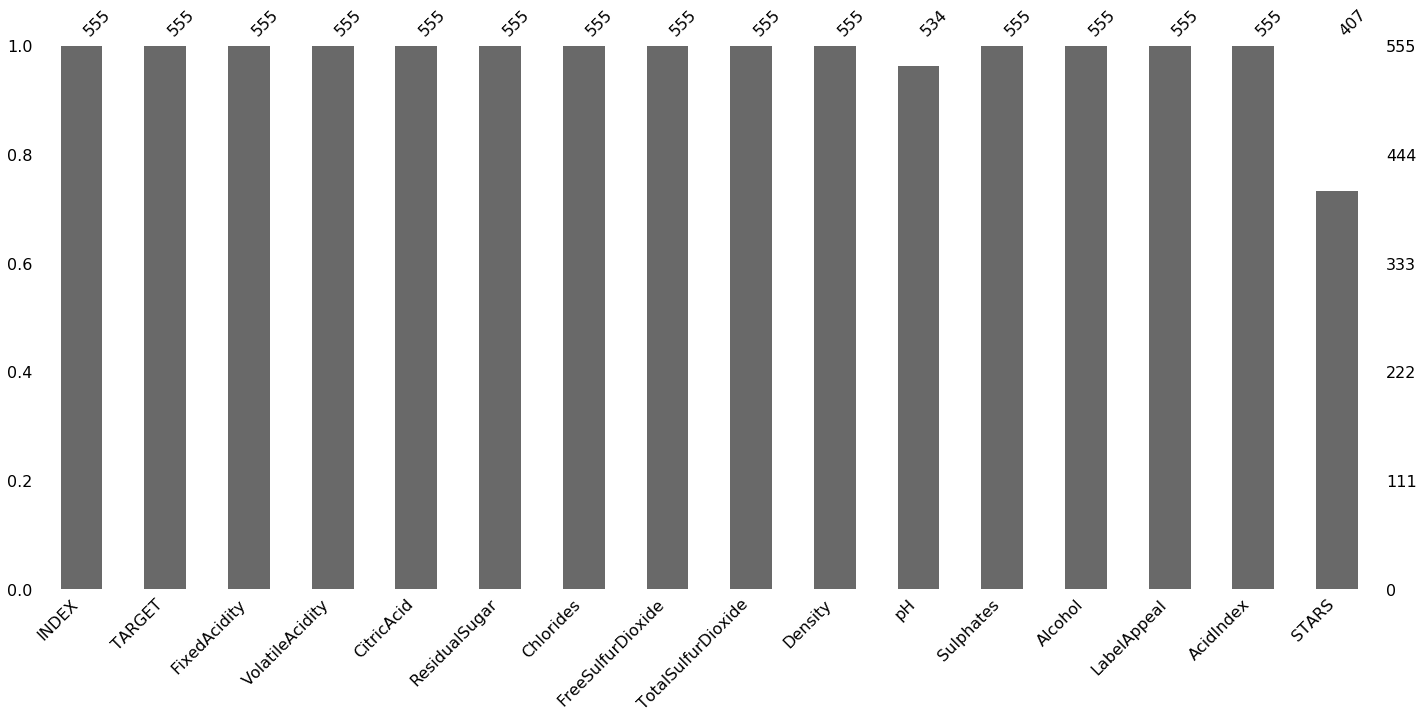

In [ ]:
#graph the number of values per row in a bar chart
msno.bar(positive);

After removing rows with invalid data, we still have null values in the pH and stars columns. We also note that our original data set of nearly 12,700 has now been truncated to 555 rows.

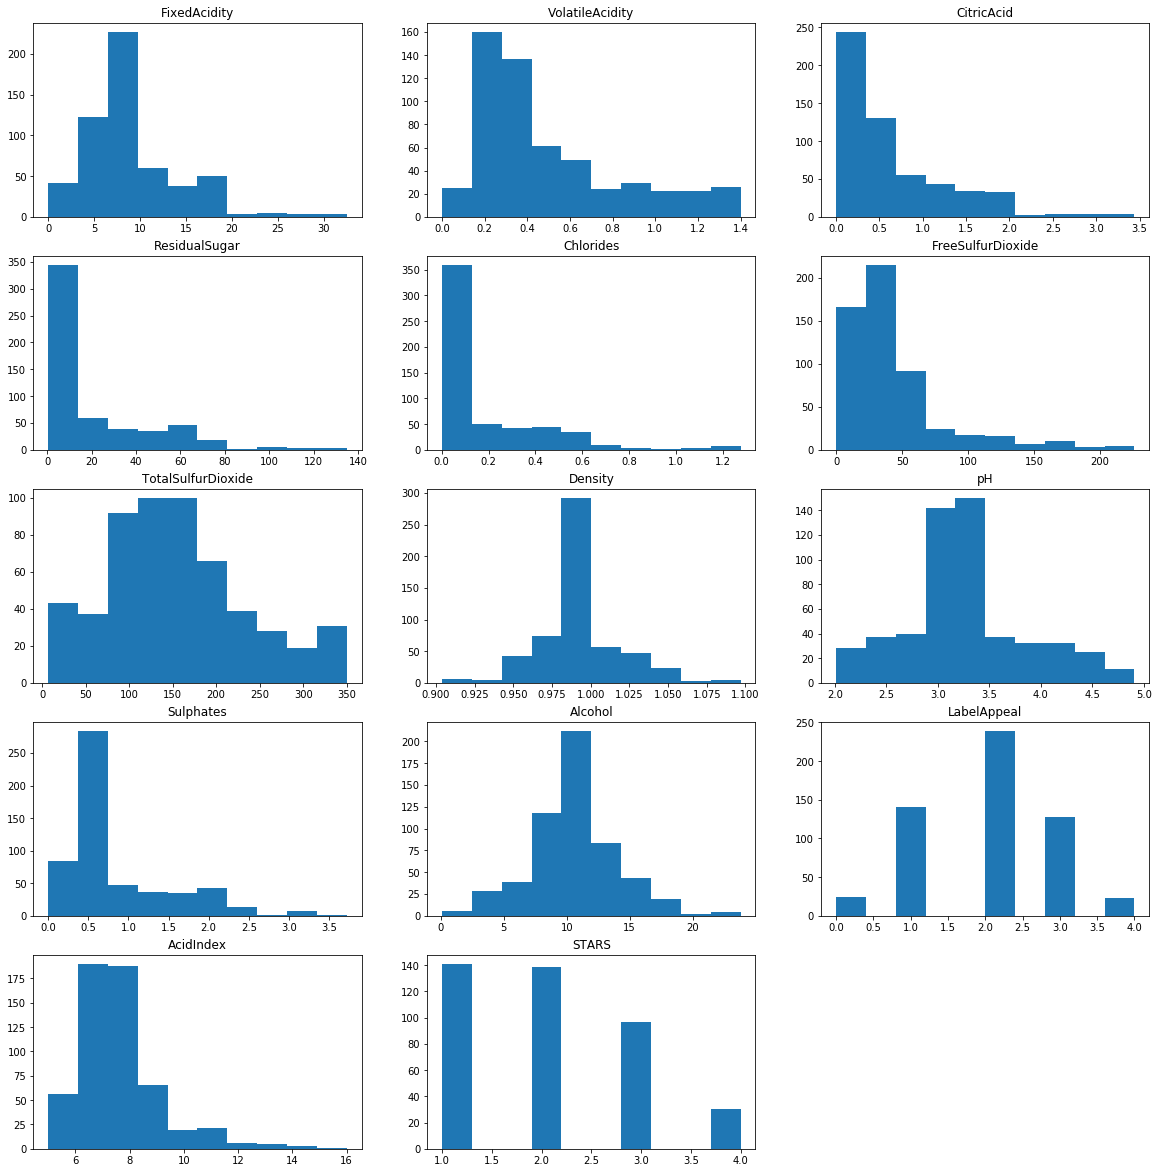

In [ ]:
#next check how this transformation affected the distributions of our attributes
plt.figure(figsize=(20,25))

#need to use an index to identify the spot of the subplot
j=1
columns=positive.columns.tolist()
for k in columns[2:] :   #for each column in the dataframe
    plt.subplot(6,3,j) 
    plt.hist(positive[k])
    plt.title('%s' %k)
    j=j+1 #add 1 to go to the next subplot space
#show results    
plt.show()

From looking at the histograms we see that the distributions for many of our attributes have changed after elimination steps, with attributes like volatile acidity, fixed acidity, citric acid, and others which previously had an approximately normal distribution now having a right skewed distribution. Next we will look a correlation matrix to see the correlation between variables.

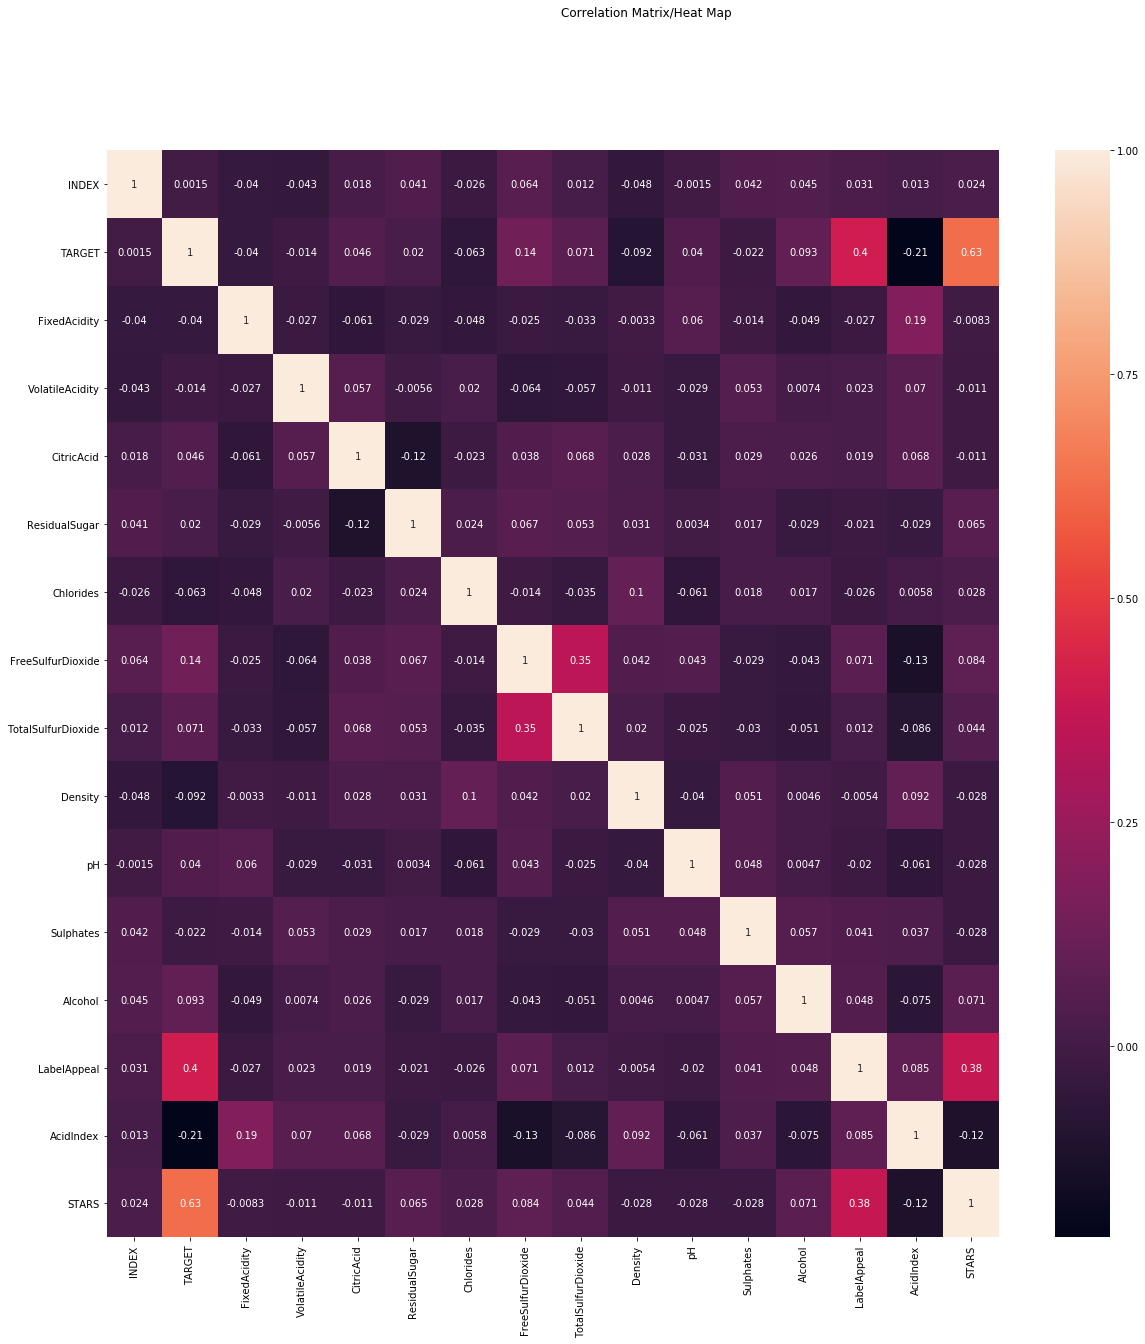

In [ ]:
#next get correlation matrix and plot it using seaborn
#note that there are issues with this plot that we resolved by following the code provided in the comments section here:
#https://github.com/mwaskom/seaborn/issues/1773
fig = plt.figure(figsize=(20, 20)) #set figure and figure size

corrMatrix = positive.corr() #get correlation matrix

sns.heatmap(corrMatrix, annot=True) #graph correlation matrix

# fix for mpl bug that cuts off top/bottom of seaborn viz taken from link above
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

fig.suptitle('Correlation Matrix/Heat Map') 
plt.show()

From the correlation heat map, we see that there are still no strong correlations between any of the variables. The strongest correlation of 0.63 is between the STARS attribute and our target attribute. Next we will replace the null values for pH and STARS.

In [ ]:
#next we create a new variable called ph_input which replaces the null values of the pH column with the mean of the pH column 
#we used the mean since we know from above that pH is approximately normally distributed
positive['ph_input']=positive.pH.replace(np.nan, positive.pH.mean())

#next we replace the null values of the STARS column with 0 to create a new value for this categorical variable
positive['STAR_Input']=positive.STARS.replace(np.nan, 0)

#check results
positive.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS,ph_input,STAR_Input
16,22,0,7.9,0.60,0.06,50.4,0.069,15.0,339.0,0.99640,3.30,0.46,3.9,3,9,NaN,3.30,0.0
22,28,3,7.1,0.97,0.25,11.2,0.135,32.0,180.0,1.00278,3.14,0.42,9.5,2,8,1.0,3.14,1.0
93,118,3,3.7,0.24,0.31,13.1,0.050,26.0,180.0,0.94955,3.05,0.53,10.4,1,8,NaN,3.05,0.0
103,136,2,6.2,1.40,1.64,15.8,0.057,39.0,248.0,1.02858,2.02,1.72,9.2,1,7,3.0,2.02,3.0
129,168,5,16.8,0.96,0.32,59.2,0.419,22.0,251.0,0.99072,3.00,0.37,11.1,2,7,NaN,3.00,0.0


In [ ]:
#double check that there are no nulls in these new columns
positive.isnull().sum()

INDEX                   0
TARGET                  0
FixedAcidity            0
VolatileAcidity         0
CitricAcid              0
ResidualSugar           0
Chlorides               0
FreeSulfurDioxide       0
TotalSulfurDioxide      0
Density                 0
pH                     21
Sulphates               0
Alcohol                 0
LabelAppeal             0
AcidIndex               0
STARS                 148
ph_input                0
STAR_Input              0
dtype: int64

Now that we have eliminated the nulls we will look at boxplots of the data to determine if we need to eliminate outliers. Note that the pH and Stars columns still contain nulls as our transformations were performed on new columns ph_input and STAR_input which do not have any nulls.

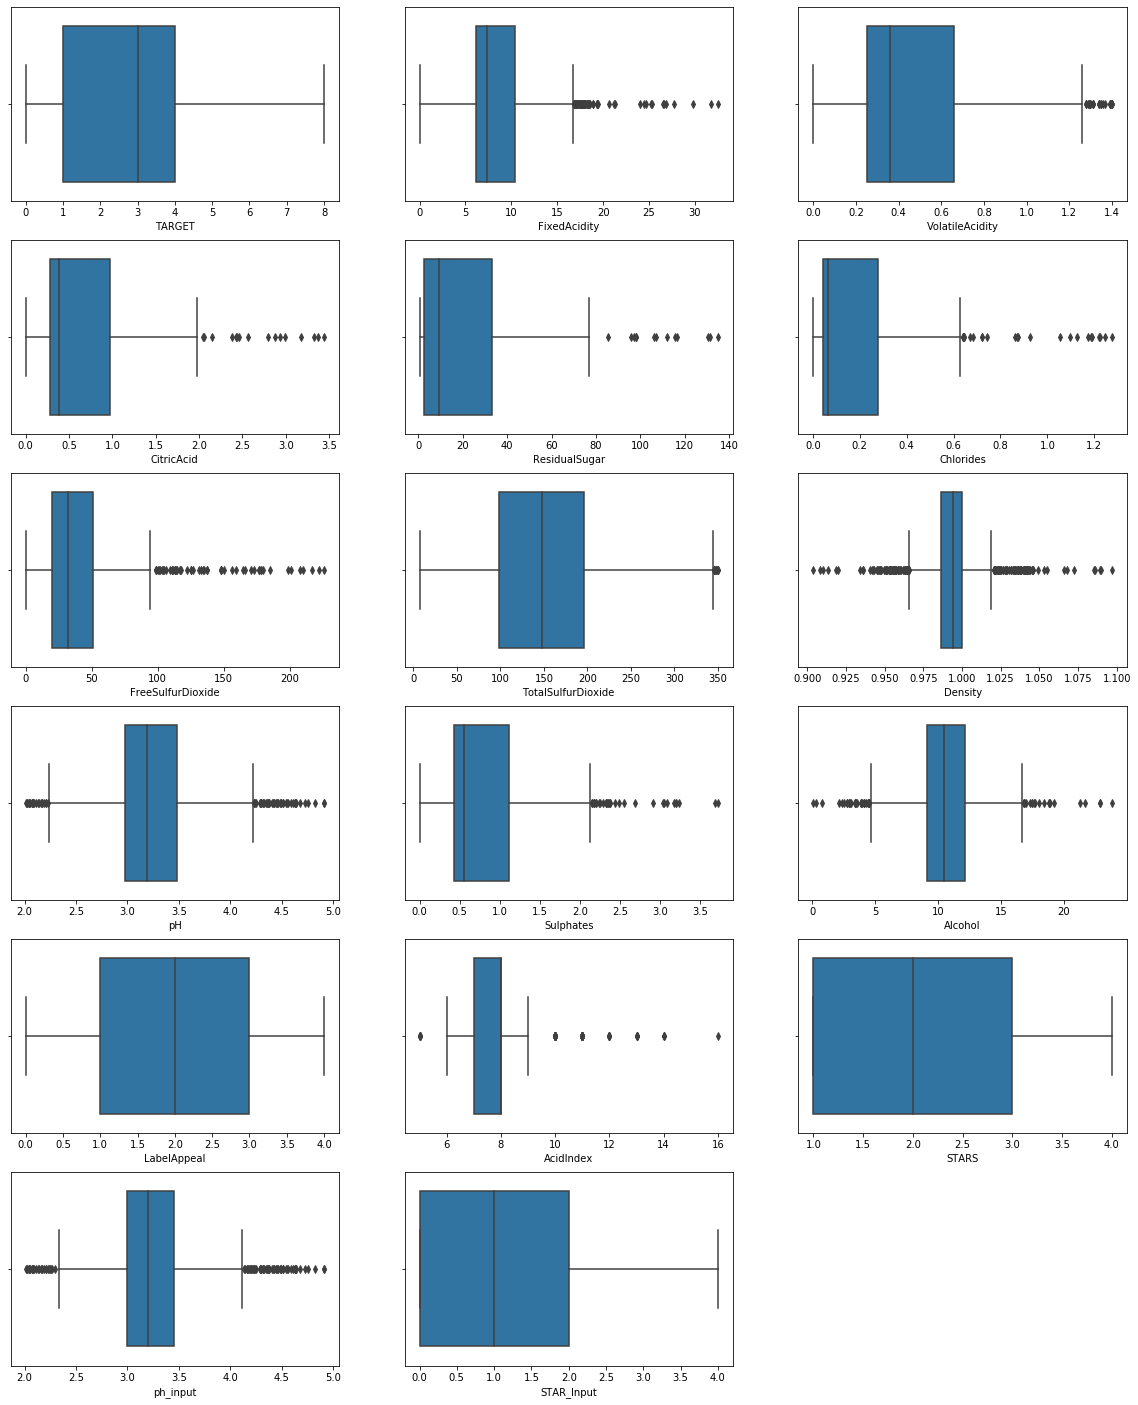

In [ ]:
#define a figure to which we will add boxplots of each attribute.
plt.figure(figsize=(20,25))

#use an index to identify the spot of the subplot
j=1
columns=positive.columns.tolist()
for k in columns[1:] :   #for each column in the dataframe
    plt.subplot(6,3,j) 
    sns.boxplot(x=k,data=positive)
    j=j+1 #add 1 to go to the next subplot space
#show results    
plt.show()

Since our boxplots indicate there are outliers, we will now examine how many outliers there are per attribute to determine if we should take further action.

In [ ]:
#create a list of the columns to pass through our for loop to count outliers
columns=positive.columns.tolist()
column2=[] #create an empty list so we can add column names to it and pass through the for loop
for i in columns:
    if i not in ('pH','STARS') :
        column2.append(i)#if column name is not pH or STARS add it to our list

new_df_pos=positive.copy() #create a copy of our data frame
print('Current shape',new_df_pos.shape) #show shape of dataframe before

#use a for loop to iterate through the columns and count outliers
for k in column2[2:] :
    IQ3=new_df_pos[k].quantile(0.75)
    IQ1=new_df_pos[k].quantile(0.25)
    IQR=(IQ3-IQ1)*1.5
    print('number of outliers for the variable %s:' %k, new_df_pos.shape[0]-new_df_pos[((new_df_pos[k]>=(IQ1-IQR)) & (new_df_pos[k]<=(IQ3+IQR))) | (new_df_pos[k].isnull())].shape[0])

Current shape (555, 18)
number of outliers for the variable FixedAcidity: 60
number of outliers for the variable VolatileAcidity: 25
number of outliers for the variable CitricAcid: 16
number of outliers for the variable ResidualSugar: 13
number of outliers for the variable Chlorides: 24
number of outliers for the variable FreeSulfurDioxide: 55
number of outliers for the variable TotalSulfurDioxide: 9
number of outliers for the variable Density: 148
number of outliers for the variable Sulphates: 32
number of outliers for the variable Alcohol: 53
number of outliers for the variable LabelAppeal: 0
number of outliers for the variable AcidIndex: 62
number of outliers for the variable ph_input: 87
number of outliers for the variable STAR_Input: 0


Although using the interquartile range method indicated there are outliers present, we decided not to remove any of them. We previously eliminated rows where we knew there were invalid data points (for example, free sulfur dioxide, total sulfur dioxide). These outliers could just be a result of having truncated the dataset. 

Further, we have already significantly reduced the size of the dataset from close to 12,700 to now 555 rows. If we were to eliminate further data, we would prefer to speak to a subject matter expert. This method is a conservative way to have enough data on which to build future models.

## Data Preparation and EDA Review - Option 2 : Substitute the negative values with their absolute value

Next we will try our second option to handle the missing values and negative values, which is to substitute the negative values with their absolute value. We feel this option may be appropriate as the absolute value of the data are still within the normal range. However, we recognize that this is a large assumption, and we would prefer to understand how this data was collected and entered to properly determine how to account for these data integrity issues.

In [ ]:
#first copy the original data set so that we can perform transformations
absolute=wine.copy()

#perform the same transformation on label appeal as above so that we do not have any negative values but do not change the distribution
absolute['LabelAppeal']=wine['LabelAppeal']+2

#get the absolute values of the new data frame to get rid of the negative values
absolute=absolute.abs().copy()

#check results
absolute.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1.0,3.0,3.2,1.160,0.98,54.2,0.567,NaN,268.0,0.99280,3.33,0.59,9.9,2.0,8.0,2.0
1,2.0,3.0,4.5,0.160,0.81,26.1,0.425,15.0,327.0,1.02792,3.38,0.70,NaN,1.0,7.0,3.0
2,4.0,5.0,7.1,2.640,0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,1.0,8.0,3.0
3,5.0,3.0,5.7,0.385,0.04,18.8,0.425,22.0,115.0,0.99640,2.24,1.83,6.2,1.0,6.0,1.0
4,6.0,4.0,8.0,0.330,1.26,9.4,NaN,167.0,108.0,0.99457,3.12,1.77,13.7,2.0,9.0,2.0


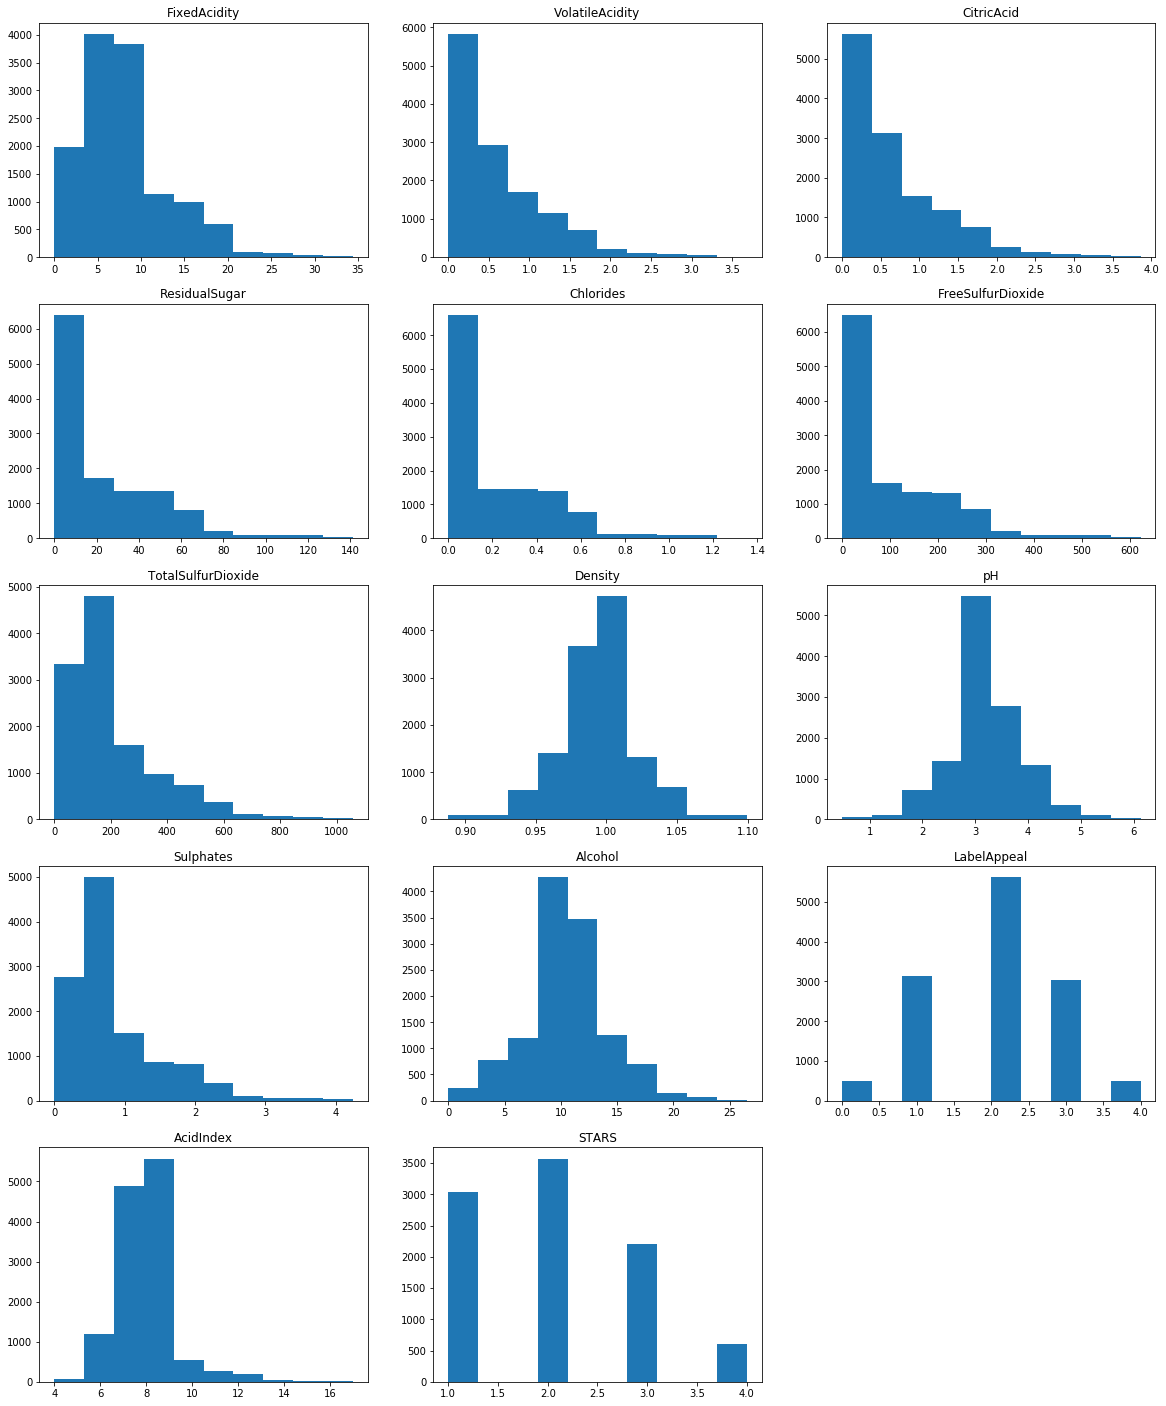

In [ ]:
#next check distributions
#define figure to which we will add the histograms of each variable
plt.figure(figsize=(20,25))

#use an index to identify the spot of the subplot
j=1
columns=absolute.columns.tolist()
for k in columns[2:] :   #for each column in the dataframe
    plt.subplot(5,3,j) 
    plt.hist(absolute[k])
    plt.title('%s' %k)
    j=j+1 #add 1 to go to the next subplot space
#show results    
plt.show()

We see that, similar to the results from our elimination methods in option 1, our transformation to absolute values has made many of the orginal normally distributed variables right skewed. Next we will check the boxplots to see if there are any outliers.

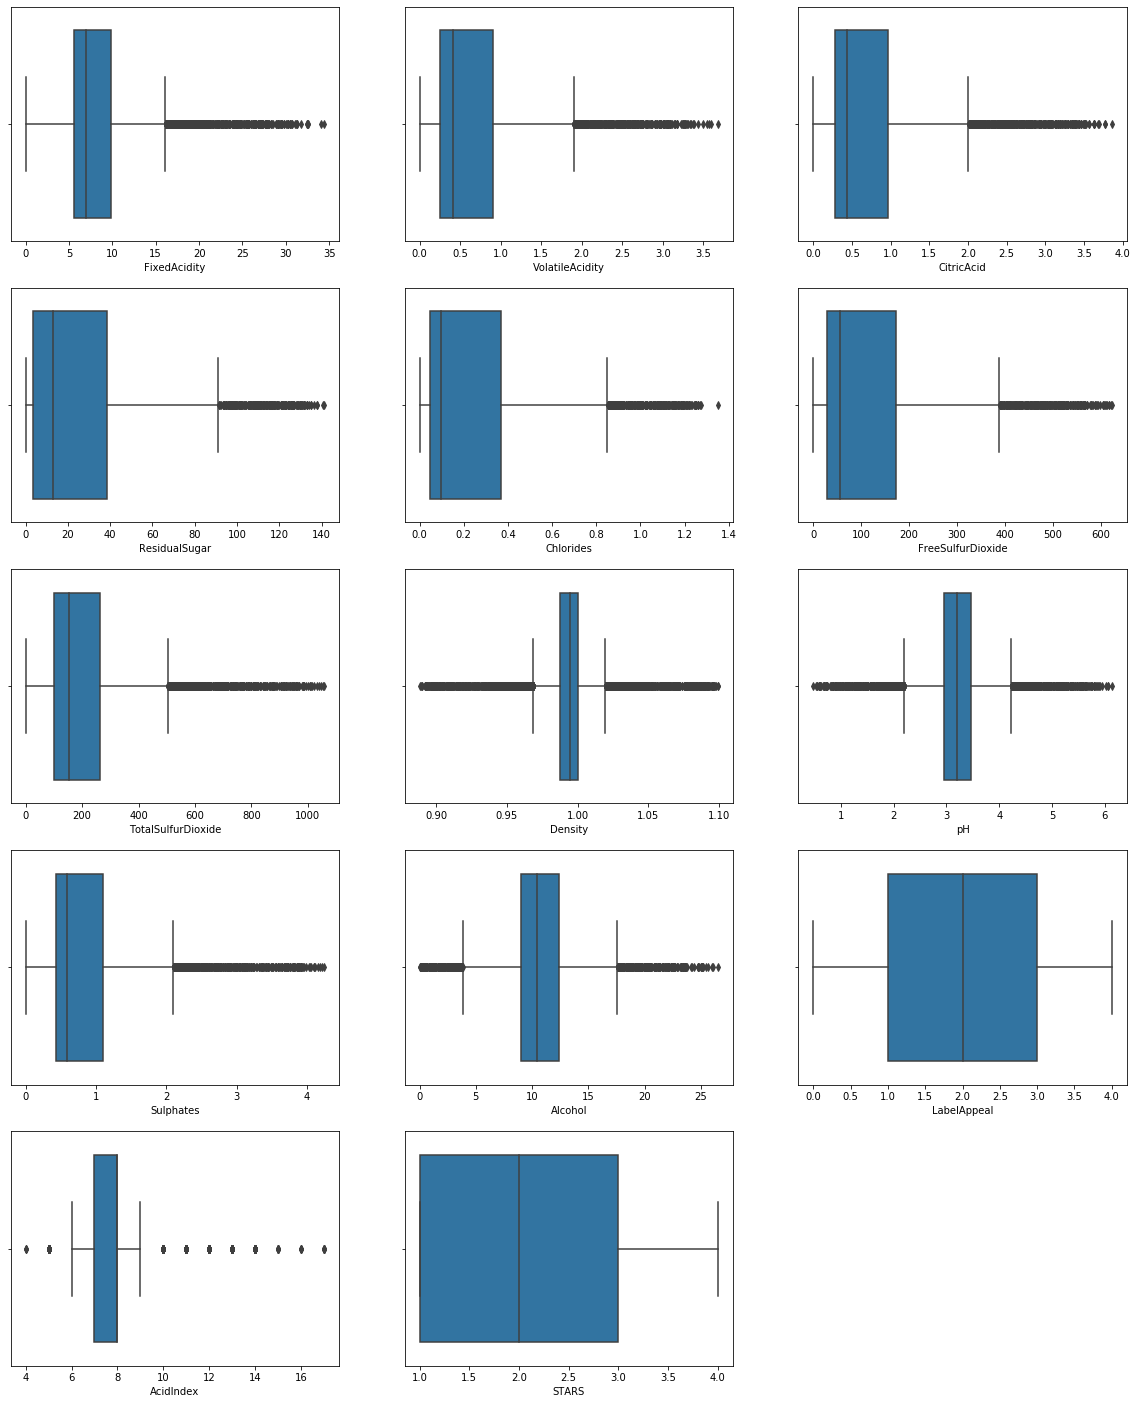

In [ ]:
#graph the boxplots. Define the figure to which we will append our boxplots
plt.figure(figsize=(20,25))

#use an index to identify the spot of the subuplot
j=1
columns=absolute.columns.tolist()
for k in columns[2:] :   #for each column in the dataframe
    plt.subplot(5,3,j) 
    sns.boxplot(x=k,data=absolute)
    j=j+1 #add 1 to go to the next subplot space
#show results    
plt.show()

We see there are outliers which we will address below. As we did in option 1, we will now eliminate invalid data using our domain knowledge.

In [ ]:
#copy the data frame 
absolute_legal=absolute.copy()

#remove rows that have a volatile acidity above 1.4
absolute_legal=absolute_legal[absolute_legal.VolatileAcidity<=1.4]

#remove rows that have a total sulfur dioxide value above 350
absolute_legal=absolute_legal[(absolute_legal.TotalSulfurDioxide<=350)
                                                 | (absolute_legal.TotalSulfurDioxide.isnull()) ]

#remove rows that have a free sulfur dioxide value above 350
absolute_legal=absolute_legal[(absolute_legal.FreeSulfurDioxide<=350) | (absolute_legal.FreeSulfurDioxide.isnull())]

#remove rows where the free sulfur dioxide value is greater than the total sulfur dioxide value
absolute_legal=absolute_legal[(absolute_legal.FreeSulfurDioxide<=absolute_legal.TotalSulfurDioxide) 
                              | (absolute_legal.FreeSulfurDioxide.isnull()) |(absolute_legal.TotalSulfurDioxide.isnull())]

#remove rows that have a pH value of less than 2 or greater than 5.
absolute_legal=absolute_legal[((absolute_legal.pH >2) & (absolute_legal.pH<5))
                                                  | (absolute_legal.pH.isnull()) ]

#check shape
absolute_legal.shape

(6511, 16)

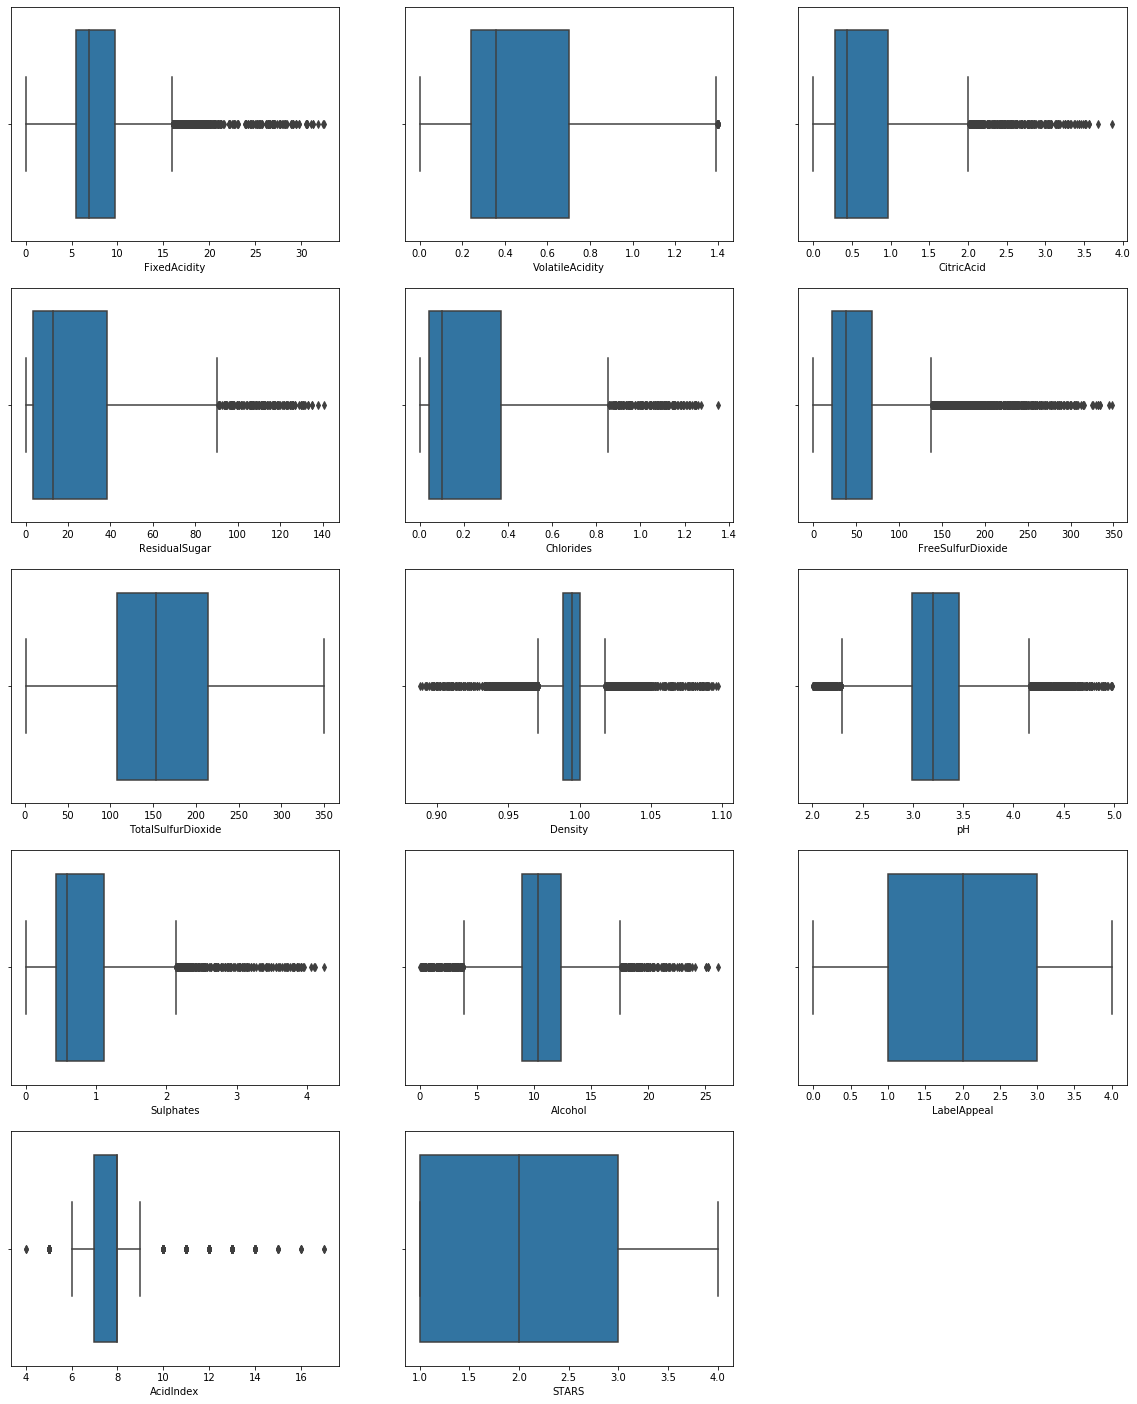

In [ ]:
#graph the boxplots. Define the figure to which we will append our boxplots
plt.figure(figsize=(20,25))

#use an index to identify the spot of the subuplot
j=1
columns=absolute_legal.columns.tolist()
for k in columns[2:] :   #for each column in the dataframe
    plt.subplot(5,3,j) 
    sns.boxplot(x=k,data=absolute_legal)
    j=j+1 #add 1 to go to the next subplot space
#show results    
plt.show()

Similar to option 1, the elimination of invalid data has led to some of the previously normally distributed variables becoming right skewed. This was expected as we transformed the negative values into absolute values, we would expect the center of the distribution as well as the skew of the distribution to change. Further, we are comfortable with these distributions being skewed based on our domain knowledge.

Next we will check for null values in our transformed dataset.

In [ ]:
#check for null values
absolute_legal.isnull().sum()

INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          310
Chlorides              351
FreeSulfurDioxide      459
TotalSulfurDioxide     566
Density                  0
pH                     206
Sulphates              627
Alcohol                337
LabelAppeal              0
AcidIndex                0
STARS                 1668
dtype: int64

We see from above that there are numerous missing values. We will now look to see if there is a correlation between the values so that we can determine the best method for filling in our missing values. 

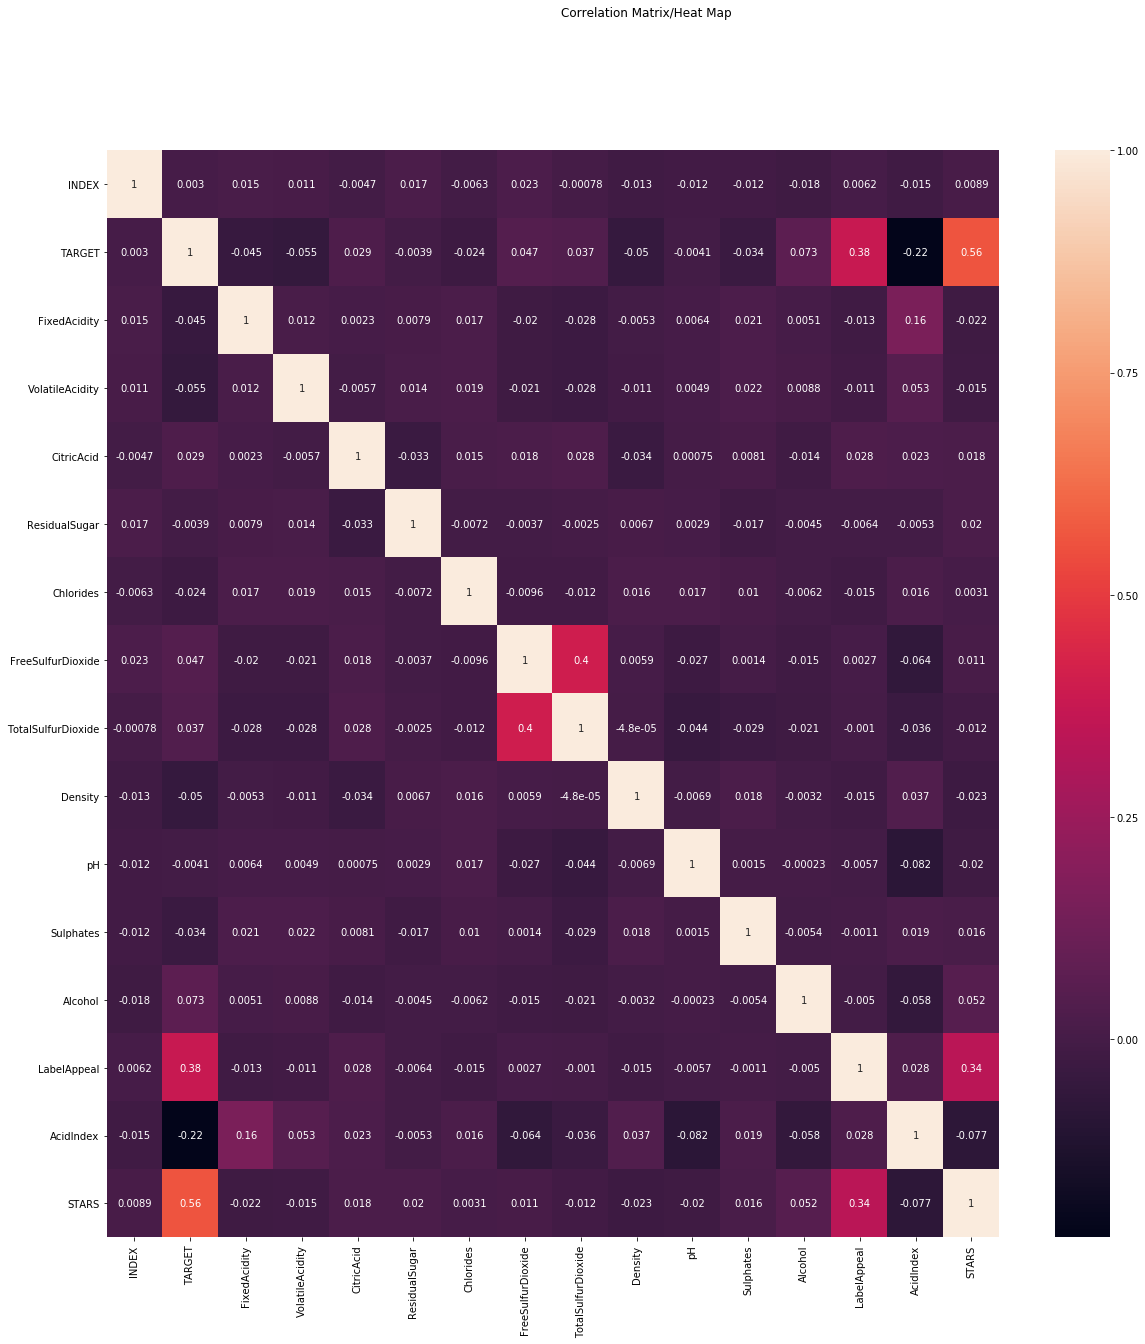

In [ ]:
#next get correlation matrix and plot it using seaborn
#note that there are issues with this plot that we resolved by following the code provided in the comments section here:
#https://github.com/mwaskom/seaborn/issues/1773
fig = plt.figure(figsize=(20, 20)) #set figure and figure size
corrMatrix = absolute_legal.corr() #get correlation matrix

sns.heatmap(corrMatrix, annot=True) #graph correlation matrix

# fix for mpl bug that cuts off top/bottom of seaborn viz taken from link above
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

fig.suptitle('Correlation Matrix/Heat Map') 
plt.show()

We see that changing the negative values to their absolute value has had little to no effect on the correlation between variables. The highest correlation we have is 0.56 and is between our response variable (target) and the stars attribute.

Next we will begin to deal with missing values. Since there are no strong correlations, we will not use regression to impute any missing values.

First we will replace the missing values in STARS with 0 so as to create a new category without disrupting the original distribution. Then we will create new columns with indicator variables to indicate where there was previously missing data.

In [ ]:
import math

#create a new data frame without the index and target columns
absolute_input=absolute_legal.iloc[:,2:].copy()

#create an indicator variable to indicate if the value for the STARS column was missing
absolute_input['STARS_Missing']=[1 if math.isnan(x)==True else 0 for x in absolute_input['STARS']]

#replace the null values in STARS with 0 as that will create a new category
absolute_input['STARS']=absolute_input.STARS.replace(np.nan, 0)

#create an indicator variable to indicate if the value for the residual sugar column was missing
absolute_input['ResidualSugar_Missing']=[1 if math.isnan(x)==True else 0 for x in absolute_input['ResidualSugar']]

#create an indicator variable to indicate if the value for the chlorides column was missing
absolute_input['Chlorides_Missing']=[1 if  math.isnan(x)==True else 0 for x in absolute_input['Chlorides']]

#create an indicator variable to indicate if the value for the free sulfur dioxide column was missing
absolute_input['FreeSulfurDioxide_Missing']=[1 if  math.isnan(x)==True else 0 for x in absolute_input['FreeSulfurDioxide']]

#create an indicator variable to indicate if the value for the total sulfur dioxide column was missing
absolute_input['TotalSulfurDioxide_Missing']=[1 if  math.isnan(x)==True else 0 for x in absolute_input['TotalSulfurDioxide']]

#create an indicator variable to indicate if the value for the pH column was missing
absolute_input['pH_Missing']=[1 if math.isnan(x)==True else 0 for x in absolute_input['pH']]

#create an indicator variable to indicate if the value for the sulphates column was missing
absolute_input['Sulphates_Missing']=[1 if  math.isnan(x)==True else 0 for x in absolute_input['Sulphates']]

#create an indicator variable to indicate if the value for the alcohol column was missing
absolute_input['Alcohol_Missing']=[1 if  math.isnan(x)==True else 0 for x in absolute_input['Alcohol']]

#check results
absolute_input.head()

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,...,AcidIndex,STARS,STARS_Missing,ResidualSugar_Missing,Chlorides_Missing,FreeSulfurDioxide_Missing,TotalSulfurDioxide_Missing,pH_Missing,Sulphates_Missing,Alcohol_Missing
0,3.2,1.160,0.98,54.20,0.567,NaN,268.0,0.99280,3.33,0.59,...,8.0,2.0,0,0,0,1,0,0,0,0
1,4.5,0.160,0.81,26.10,0.425,15.0,327.0,1.02792,3.38,0.70,...,7.0,3.0,0,0,0,0,0,0,0,1
3,5.7,0.385,0.04,18.80,0.425,22.0,115.0,0.99640,2.24,1.83,...,6.0,1.0,0,0,0,0,0,0,0,0
8,14.8,0.270,1.05,11.25,0.007,213.0,NaN,0.99620,4.93,0.26,...,6.0,0.0,1,0,0,0,1,0,0,0
9,5.5,0.220,0.39,1.80,0.277,62.0,180.0,0.94724,3.09,0.75,...,8.0,4.0,0,0,0,0,0,0,0,0


Next we will impute the missing values using Scikit-Learn's K-Nearest-Neighbors function (KNN). We chose to use a k value of 81 as it is the square root of the sample size. Since we have numerous different data types, and there is poor correlation, KNN is a good choice. 

In [ ]:
#import module
from sklearn.impute import KNNImputer
#impute the values using K value of 81
imputer = KNNImputer(n_neighbors=81, weights="uniform")

#take the array results and transform into a dataframe
#we will use only the first 14 input variables as the others are the indicator variables
absolute_input_knn=pd.DataFrame(imputer.fit_transform(absolute_input.iloc[:,:14])
                                ,columns=absolute_input.columns.tolist()[:-8])
#show results
absolute_input_knn.head()

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,3.2,1.160,0.98,54.20,0.567,91.666667,268.000000,0.99280,3.33,0.59,9.900000,2.0,8.0,2.0
1,4.5,0.160,0.81,26.10,0.425,15.000000,327.000000,1.02792,3.38,0.70,10.368519,1.0,7.0,3.0
2,5.7,0.385,0.04,18.80,0.425,22.000000,115.000000,0.99640,2.24,1.83,6.200000,1.0,6.0,1.0
3,14.8,0.270,1.05,11.25,0.007,213.000000,165.944444,0.99620,4.93,0.26,15.000000,2.0,6.0,0.0
4,5.5,0.220,0.39,1.80,0.277,62.000000,180.000000,0.94724,3.09,0.75,12.600000,2.0,8.0,4.0


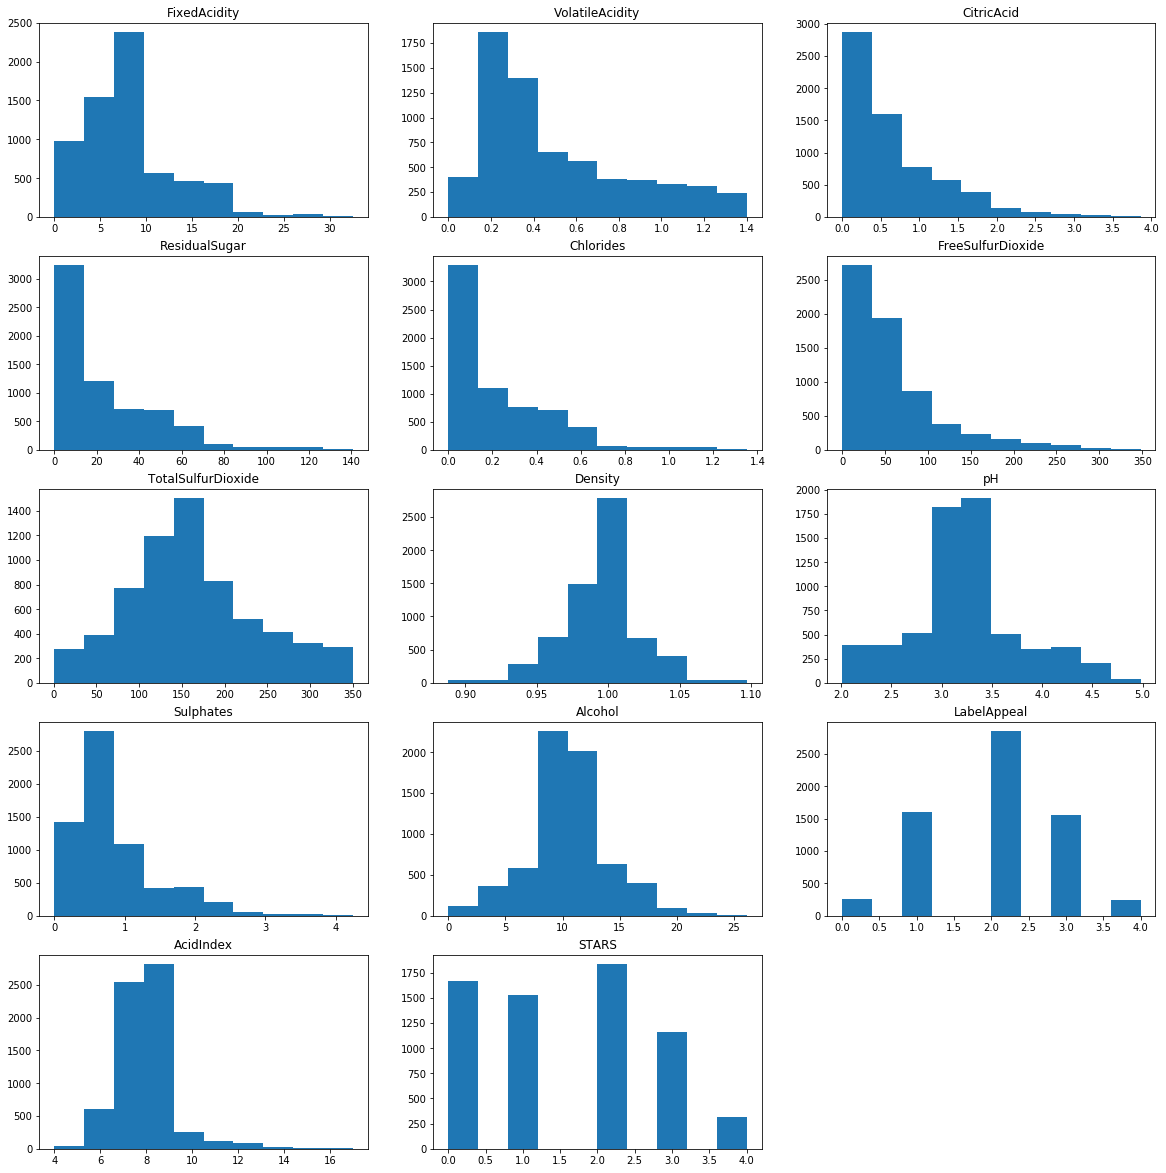

In [ ]:
#next check distributions
#define figure to which we will add the histograms of each variable
plt.figure(figsize=(20,25))

#use an index to identify the spot of the subplot
j=1
columns=absolute_input_knn.columns.tolist()
for k in columns :   #for each column in the dataframe
    plt.subplot(6,3,j) 
    plt.hist(absolute_input_knn[k]);
    plt.title('%s' %k)
    j=j+1 #add 1 to go to the next subplot space
#show results   
plt.show()

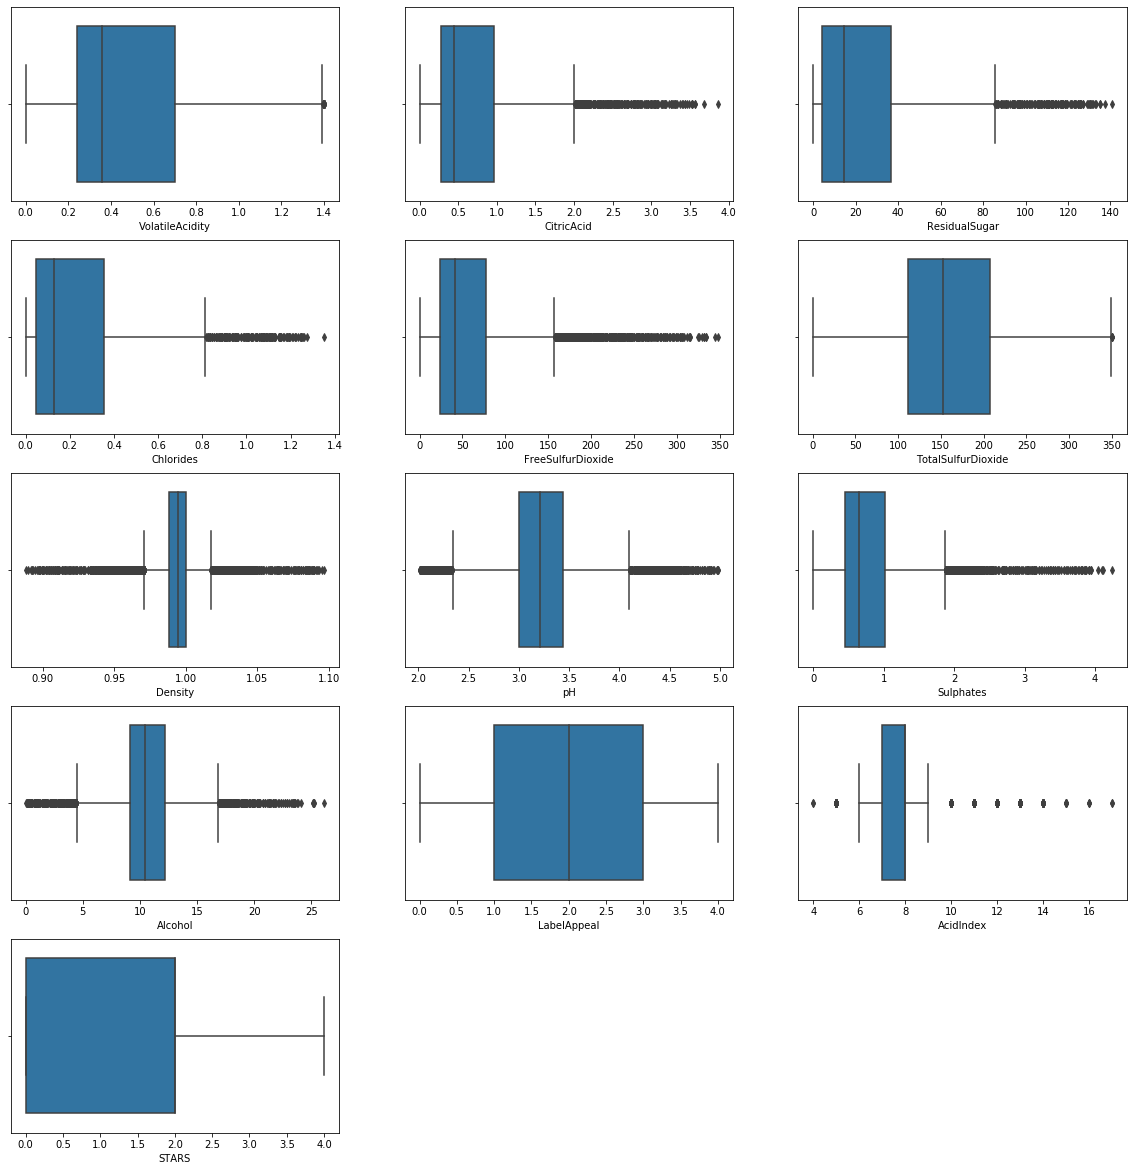

In [ ]:
#graph the boxplots. Define the figure to which we will append our boxplots
plt.figure(figsize=(20,25))

#use an index to identify the spot of the subplot
j=1
columns=absolute_input_knn.columns.tolist()
for k in columns[1:14] :   #for each column in the dataframe
    plt.subplot(6,3,j) 
    sns.boxplot(x=k,data=absolute_input_knn)
    j=j+1 #add 1 to go to the next subplot space
#show results    
plt.show()

In [ ]:
#check for number of outliers per column
columns=absolute_input_knn.columns.tolist()
new_df=absolute_input_knn.copy()
print('start',absolute_input_knn.shape)
for k in columns[2:14] :
    IQ3=new_df[k].quantile(0.75)
    IQ1=new_df[k].quantile(0.25)
    IQR=(IQ3-IQ1)*1.5
    print('number outliers for %s' %k, new_df.shape[0]-new_df[((new_df[k]>=(IQ1-IQR)) & (new_df[k]<=(IQ3+IQR))) | (new_df[k].isnull())].shape[0])

start (6511, 14)
number outliers for CitricAcid 251
number outliers for ResidualSugar 152
number outliers for Chlorides 176
number outliers for FreeSulfurDioxide 482
number outliers for TotalSulfurDioxide 4
number outliers for Density 2074
number outliers for pH 1019
number outliers for Sulphates 582
number outliers for Alcohol 649
number outliers for LabelAppeal 0
number outliers for AcidIndex 539
number outliers for STARS 0


Our distributions after imputation are very similar to our distributions after we took the absolute value of the negative data points. It seems that the imputation did not change the pdf of the variables.

Although there appear to be outliers, we decided not to remove any of them. We previously eliminated rows where we knew there were invalid data points (for example, free sulfur dioxide, total sulfur dioxide). These outliers could just be a result of having truncated the dataset. 

Further, we have already significantly reduced the size of the dataset from close to 12,700 to now 6,511 rows. If we were to eliminate further data, we would prefer to speak to a subject matter expert. This method is a conservative way to have enough data on which to build future models.

Since the scope of the assignment is to create a dataset that can be ingested by a machine learning model, next we re-insert the target variable and index and the indicator variables into the dataset. 

In [ ]:
#create a dataset that is ready to be used for a model
#we don't need to use any index to join the datasets because the order of the rows was maintained throughout our transformations
target=absolute_legal.iloc[:,:2].reset_index(drop=True).copy()
explanatory=absolute_input_knn.reset_index(drop=True).copy()
flag=absolute_input.iloc[:,14:].reset_index(drop=True).copy()
absolute_output_df=pd.concat([target,explanatory,flag],axis=1)

#check results
absolute_output_df.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,...,AcidIndex,STARS,STARS_Missing,ResidualSugar_Missing,Chlorides_Missing,FreeSulfurDioxide_Missing,TotalSulfurDioxide_Missing,pH_Missing,Sulphates_Missing,Alcohol_Missing
0,1.0,3.0,3.2,1.160,0.98,54.20,0.567,91.666667,268.000000,0.99280,...,8.0,2.0,0,0,0,1,0,0,0,0
1,2.0,3.0,4.5,0.160,0.81,26.10,0.425,15.000000,327.000000,1.02792,...,7.0,3.0,0,0,0,0,0,0,0,1
2,5.0,3.0,5.7,0.385,0.04,18.80,0.425,22.000000,115.000000,0.99640,...,6.0,1.0,0,0,0,0,0,0,0,0
3,12.0,3.0,14.8,0.270,1.05,11.25,0.007,213.000000,165.944444,0.99620,...,6.0,0.0,1,0,0,0,1,0,0,0
4,13.0,6.0,5.5,0.220,0.39,1.80,0.277,62.000000,180.000000,0.94724,...,8.0,4.0,0,0,0,0,0,0,0,0


Next we will verify that there are no nulls in this new dataframe.

In [ ]:
#double check that there are no nulls in these new columns
absolute_output_df.isnull().sum()

INDEX                         0
TARGET                        0
FixedAcidity                  0
VolatileAcidity               0
CitricAcid                    0
ResidualSugar                 0
Chlorides                     0
FreeSulfurDioxide             0
TotalSulfurDioxide            0
Density                       0
pH                            0
Sulphates                     0
Alcohol                       0
LabelAppeal                   0
AcidIndex                     0
STARS                         0
STARS_Missing                 0
ResidualSugar_Missing         0
Chlorides_Missing             0
FreeSulfurDioxide_Missing     0
TotalSulfurDioxide_Missing    0
pH_Missing                    0
Sulphates_Missing             0
Alcohol_Missing               0
dtype: int64

There are no missing values in our dataset.

## Conclusion

Each option yielded results that were robust enough to be used in future machine learning models. The second option makes a very large assumption that all negative values were incorrectly inputting during data entry, which we have no proof of. Therefore, although option 2 yielded a dataframe with more rows, which option we decide to use for a future model would be determined by how conservative we want our estimates to be. 

We decided not to normalize the data as this is a further step which we could take if the machine learning model requires it. We think it's better at this stage to maintain as much of the original data as possible.

The best way to determine which option was best here, would be to build a model and see which option generated the most accurate results.